# Курсовая работа. Блок ML Beginner
<br>

**NB!** Код должен быть с комментариями к каждому логическому блоку кода. В противном случае работа **не** будет принята. <br><br>
Выполнение курсовой работы может потребовать использование дополнительных библиотек. Может потребоваться предварительная обработка данных.

<br><br>
**Описание работы:**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; Любой бизнес хочет максимизировать количество клиентов. Для достижения этой цели важно не только пытаться привлечь новых, но и удерживать уже существующих. Удержать клиента обойдется компании дешевле, чем привлечь нового. Кроме того, новый клиент может оказаться слабо заинтересованным в услугах бизнеса и с ним будет сложно работать, тогда как о старых клиентах уже есть необходимые данные по взаимодействию с сервисом.
 <br>

&nbsp;&nbsp;&nbsp;&nbsp; Соответственно, прогнозируя отток, мы можем вовремя среагировать и попытаться удержать клиента, который хочет уйти. Опираясь на данные об услугах, которыми пользуется клиент, мы можем сделать ему специальное предложение, пытаясь изменить его решение об уходе от оператора. Благодаря этому задача удержания будет легче в реализации, чем задача привлечения новых пользователей, о которых мы еще ничего не знаем.<br>

&nbsp;&nbsp;&nbsp;&nbsp; Вам предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты.
<br>

&nbsp;&nbsp;&nbsp;&nbsp; Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят). Работа должна включать в себя следующие обязательные пункты:
1. Описание данных *(с расчетом базовых статистик)*,
2. Исследование зависимостей и формулирование гипотез,
3. Построение моделей для прогнозирования оттока *(с обоснованием выбора той или иной модели)* на основе проверенных гипотез и выявленных взаимосвязей,
4. Сравнение качества полученных моделей.

Во втором разделе обязательно должно присутствовать обоснование гипотез, подробное описание выявленных взаимосвязей, а также их визуализация.
<br>В четвертом дополнительно должны быть сформулированы общие выводы работы.

<br><br>

_________

[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


## Codebook
<br>

[Ссылка для скачивания данных](https://drive.google.com/open?id=1dPCG76ST6NohYKtVMGv6HpFL-jD5p1eJ)
<br><br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

# 1. Описание данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Взглянем на небольшой кусочек предоставленных данных.

In [ ]:
# Загрузка данных из CSV файла
data = pd.read_csv("telecom_users.csv")

# Создадим словари с заменами
replace_dict = {'Yes': 1, 'No': 0}
replace_dict_gender = {'Male': 1, 'Female': 0}
replace_dict_phone = {'Yes': 1, 'No': 0, 'No phone service': 2}
replace_dict_internet = {'Yes': 1, 'No': 0, 'No internet service': 2}
replace_dict_InternetService = {'Fiber optic': 1, 'No': 0, 'DSL': 2}
replace_dict_Contract = {'One year': 1, 'Month-to-month': 0, 'Two year': 2}
replace_dict_PaymentMethod = {'Credit card (automatic)': 1, 'Bank transfer (automatic)': 0, 'Electronic check': 2, 'Mailed check': 3}

# Создадим списки столбцов с заменами
columns_to_replace = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
columns_to_replac_gender = ['gender']
columns_to_replace_phone = ['MultipleLines']
columns_to_replace_internet = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
columns_to_replace_InternetService = ['InternetService']
columns_to_replace_Contract = ['Contract']
columns_to_replace_PaymentMethod = ['PaymentMethod']

# Применим замену на нескольких столбцах
data[columns_to_replace] = data[columns_to_replace].applymap(replace_dict.get)
data[columns_to_replac_gender] = data[columns_to_replac_gender].applymap(replace_dict_gender.get)
data[columns_to_replace_phone] = data[columns_to_replace_phone].applymap(replace_dict_phone.get)
data[columns_to_replace_internet] = data[columns_to_replace_internet].applymap(replace_dict_internet.get)
data[columns_to_replace_InternetService] = data[columns_to_replace_InternetService].applymap(replace_dict_InternetService.get)
data[columns_to_replace_Contract] = data[columns_to_replace_Contract].applymap(replace_dict_Contract.get)
data[columns_to_replace_PaymentMethod] = data[columns_to_replace_PaymentMethod].applymap(replace_dict_PaymentMethod.get)

# Замена значений null на 0 в столбце 'TotalCharges'
data['TotalCharges'] = data['TotalCharges'].fillna(0)

# Преобразование строк в столбце 'TotalCharges' в числа с обработкой некорректных значений
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

data.head(5)

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,1,0,1,1,72,1,1,0,...,2,2,2,2,2,0,1,24.10,1734.65,0
1,4528,9688-YGXVR,0,0,0,0,44,1,0,1,...,1,0,1,0,0,1,1,88.15,3973.20,0
2,6344,9286-DOJGF,0,1,1,0,38,1,1,1,...,0,0,0,0,0,1,0,74.95,2869.85,1
3,6739,6994-KERXL,1,0,0,0,4,1,0,2,...,0,0,0,1,0,1,2,55.90,238.50,0
4,432,2181-UAESM,1,0,0,0,2,1,0,2,...,1,0,0,0,0,0,2,53.45,119.50,0


Посмотрим на наличие пропущенных значений, чтобы не столкнуться с неприятными сюрпризами при дальнейшей работе.

<Axes: >

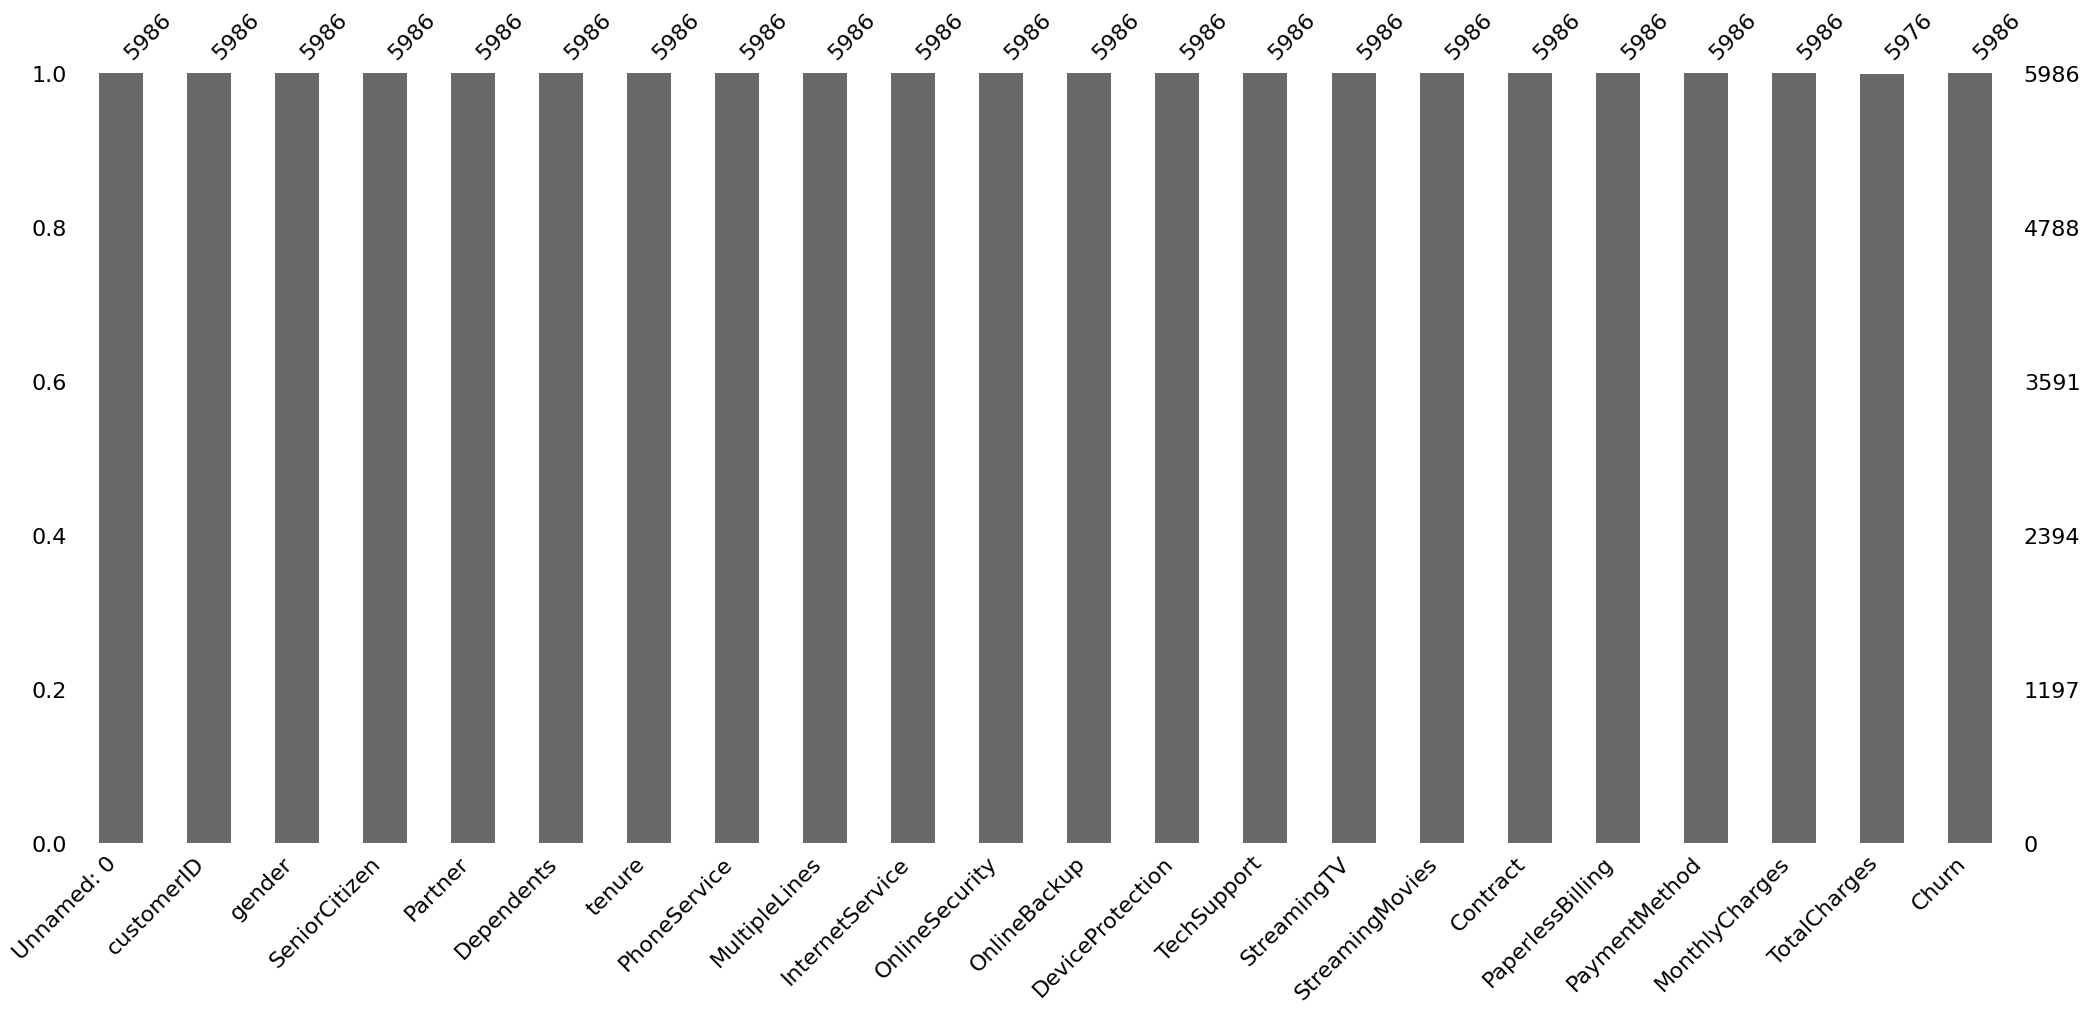

In [ ]:
import missingno as msno

msno.bar(data)

<Axes: >

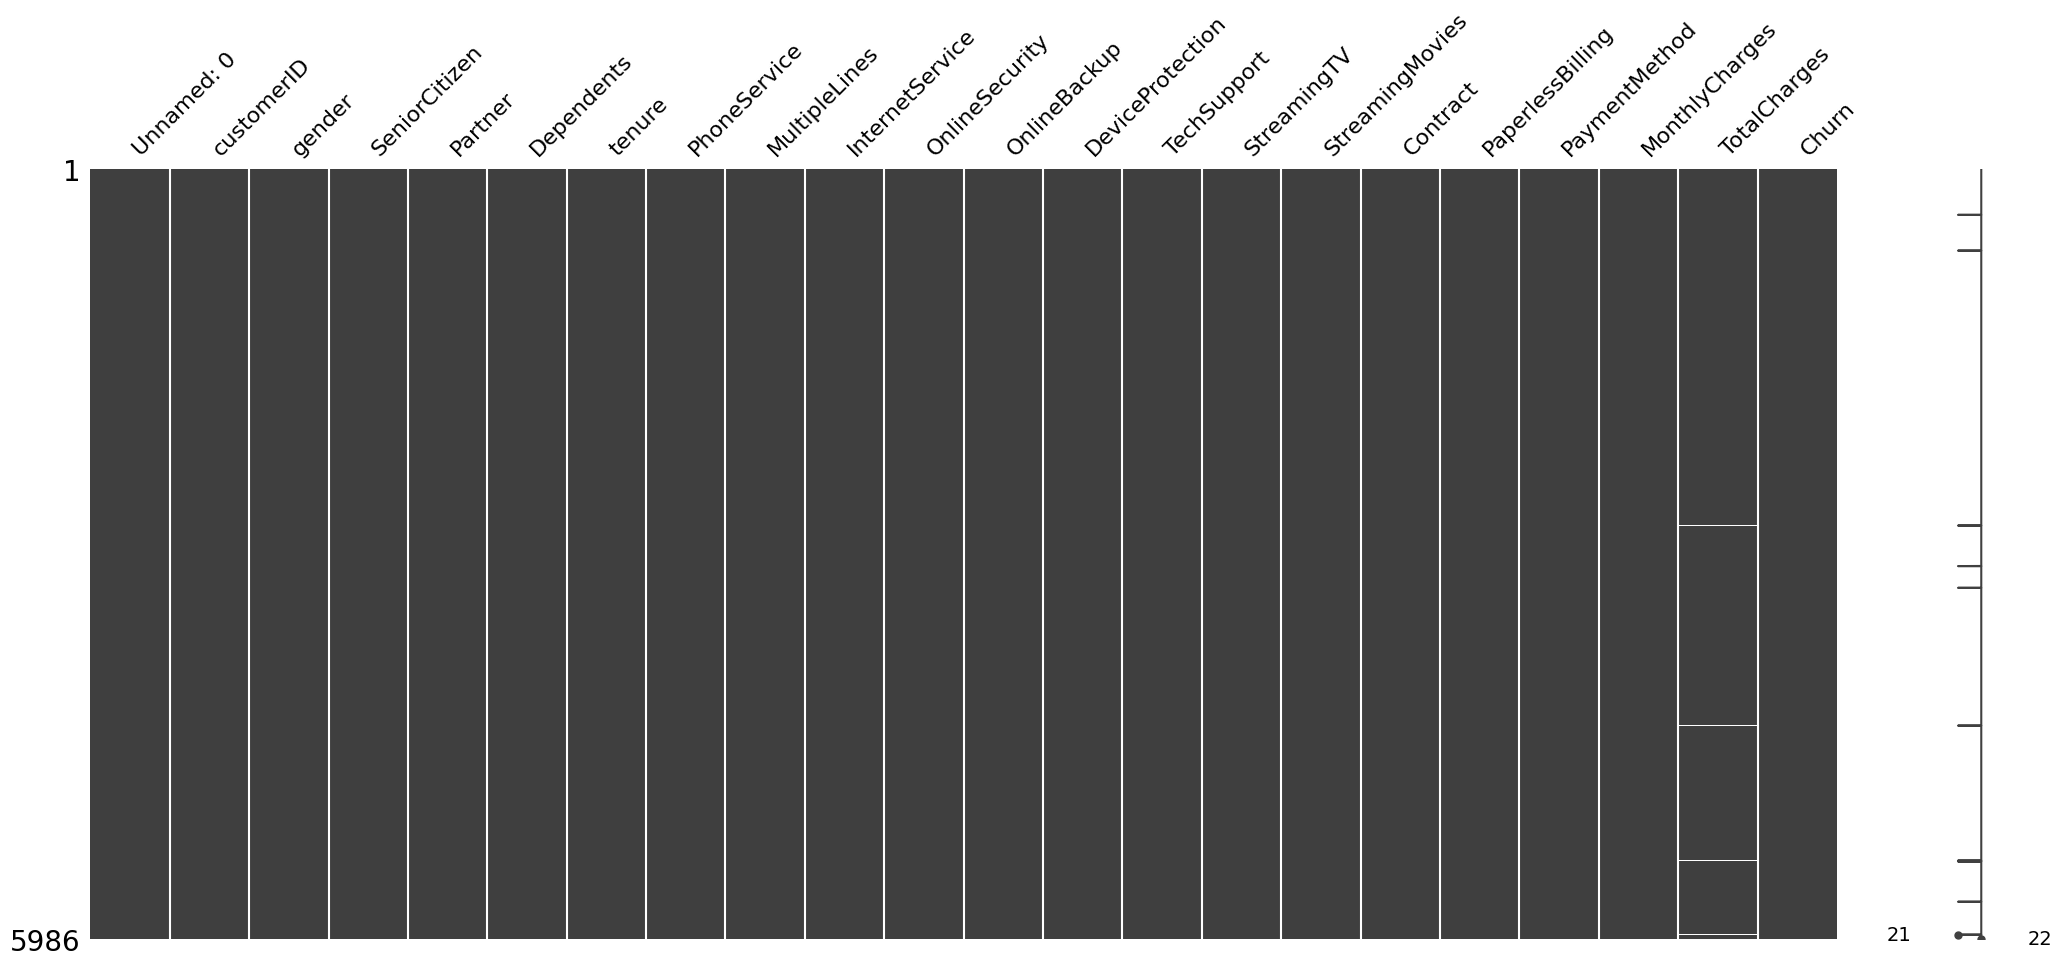

In [ ]:
msno.matrix(data)

Видим, что были 10 пропущенных значений в столбце TotalCharges. Мы удалили эти 10 строк, так как их количество крайне мало.

Далее приступим к изучению каждого атрибута датасета по отдельности и выведем ряд статистик для каждого из них.

In [ ]:
data.dtypes

Unnamed: 0            int64
customerID           object
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [ ]:
data.describe(include=[np.number]).drop(['Unnamed: 0'], axis=1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5976.000000,5986.000000
mean,0.509522,0.161377,0.485132,0.299198,32.468760,0.901437,0.622787,1.129803,0.717508,0.780488,0.774641,0.721183,0.816572,0.822085,0.694621,0.589375,1.574006,64.802213,2298.060617,0.265119
std,0.499951,0.367909,0.499821,0.457945,24.516391,0.298100,0.657360,0.737824,0.796327,0.776381,0.778469,0.795314,0.762377,0.760064,0.832884,0.491988,1.067302,30.114702,2274.127165,0.441433
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.650000,404.312500,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.400000,1412.150000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,56.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,89.900000,3846.962500,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


# 2. Исследование зависимостей и формулирование гипотез

In [ ]:
from sklearn.model_selection import train_test_split

# Удалим столбец 'customerID' так как в нём нет смысла
data = data.drop(['customerID'], axis=1)

# Удалим строки с пустыми значениями
data = data.dropna()

# Отделим целевую переменную от признаков
X = data.drop('Churn', axis=1)
y = data['Churn']

# Разделим данные на тренировочный и тестовый датасеты
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=17)

data.head()

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,1,0,1,1,72,1,1,0,2,...,2,2,2,2,2,0,1,24.10,1734.65,0
1,4528,0,0,0,0,44,1,0,1,0,...,1,0,1,0,0,1,1,88.15,3973.20,0
2,6344,0,1,1,0,38,1,1,1,0,...,0,0,0,0,0,1,0,74.95,2869.85,1
3,6739,1,0,0,0,4,1,0,2,0,...,0,0,0,1,0,1,2,55.90,238.50,0
4,432,1,0,0,0,2,1,0,2,1,...,1,0,0,0,0,0,2,53.45,119.50,0


In [ ]:
# Вычисление корреляционной матрицы
correlation_matrix = data.corr()

# Вывод корреляционной матрицы
print(correlation_matrix)

                  Unnamed: 0    gender  SeniorCitizen   Partner  Dependents  \
Unnamed: 0          1.000000 -0.007510      -0.000593 -0.000815   -0.007192   
gender             -0.007510  1.000000      -0.007322 -0.007460    0.008643   
SeniorCitizen      -0.000593 -0.007322       1.000000  0.015346   -0.213563   
Partner            -0.000815 -0.007460       0.015346  1.000000    0.448684   
Dependents         -0.007192  0.008643      -0.213563  0.448684    1.000000   
tenure              0.008855  0.003617       0.004503  0.384269    0.167677   
PhoneService       -0.025809 -0.006170       0.009231  0.025797    0.000294   
MultipleLines       0.009052  0.004397       0.091672  0.089576   -0.016677   
InternetService     0.013872  0.003269       0.033346 -0.005681   -0.045739   
OnlineSecurity     -0.003725 -0.008243      -0.211721  0.088088    0.194335   
OnlineBackup       -0.007806 -0.007394      -0.156294  0.093294    0.163657   
DeviceProtection   -0.010316  0.001587      -0.15724

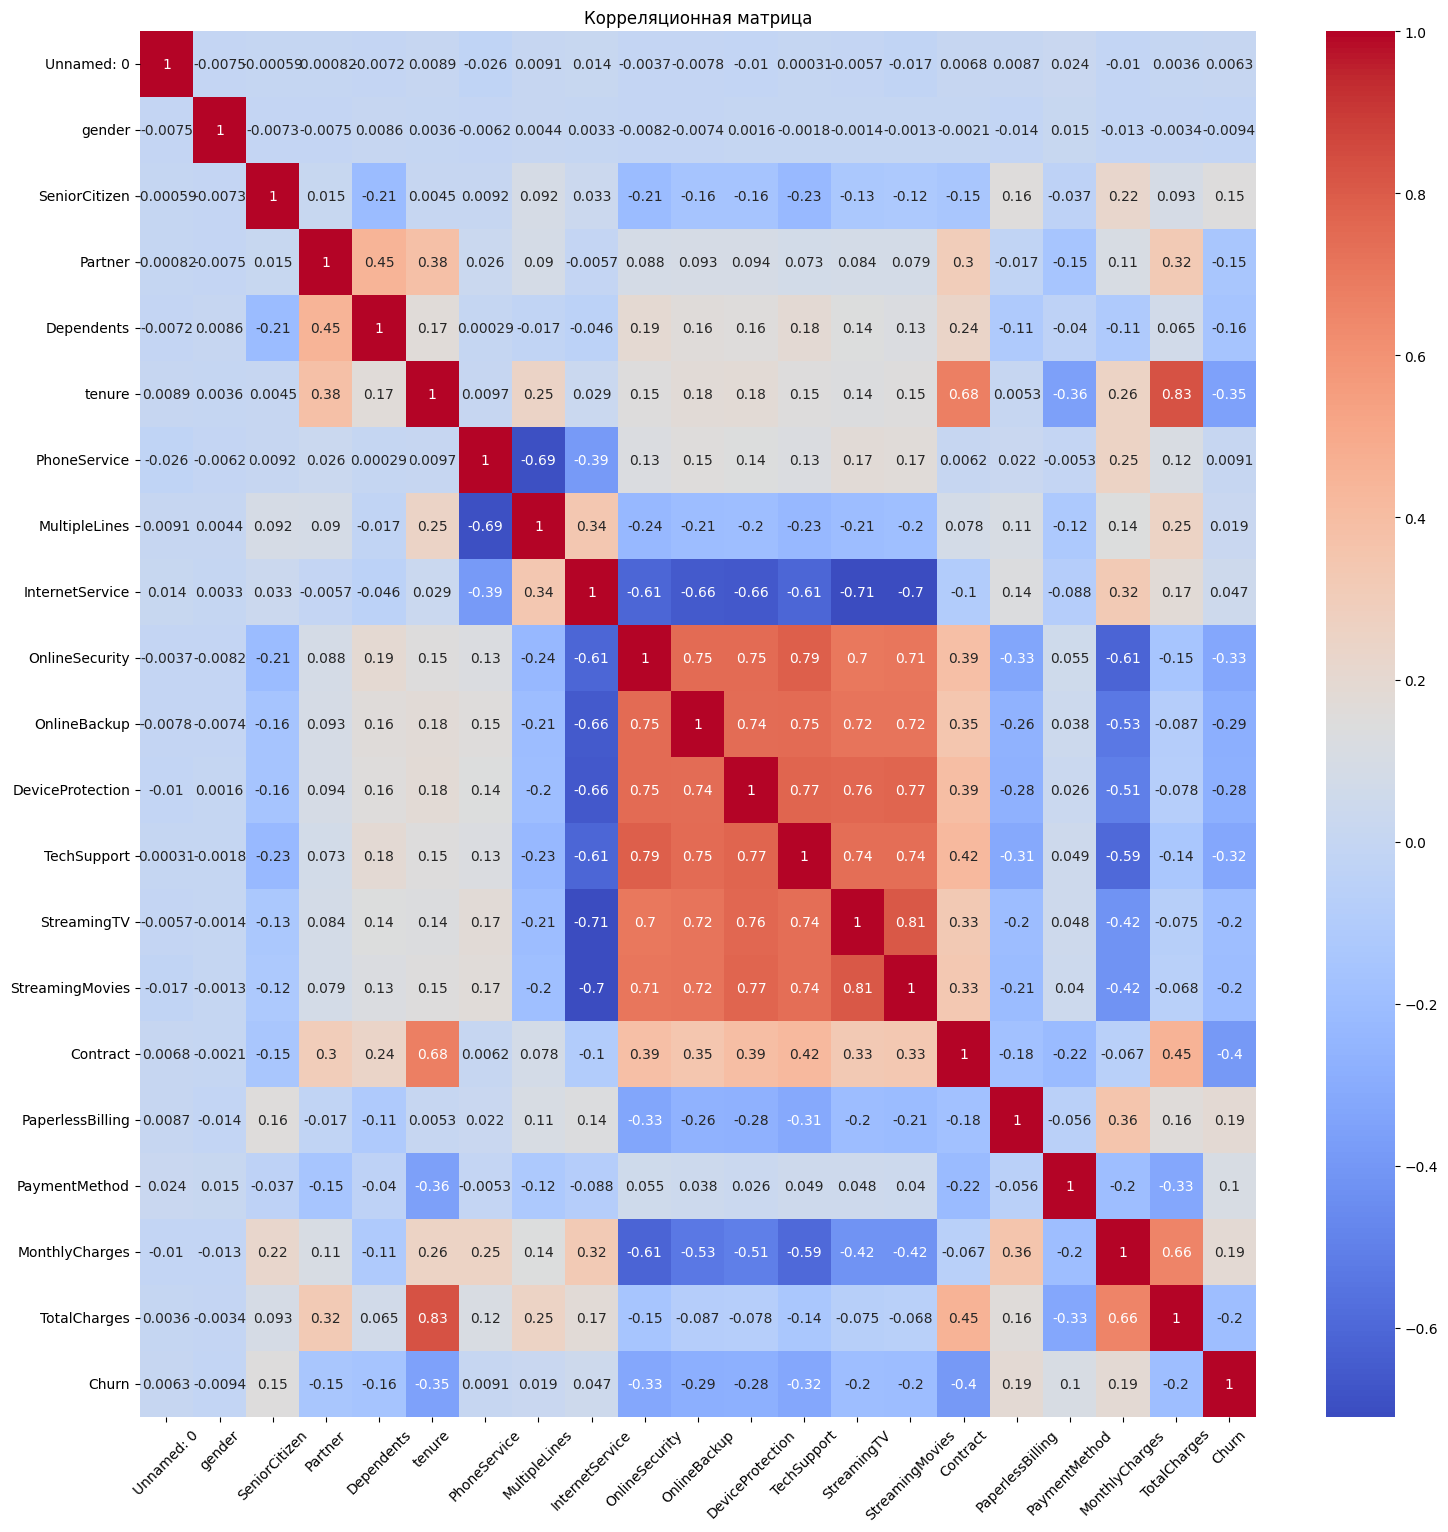

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Установка размера графика
plt.figure(figsize=(18, 18))

# Визуализация с использованием тепловой карты
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

# Настройка внешнего вида
plt.title('Корреляционная матрица')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


Исходя из анализа корреляционной матрицы, мы можем сделать следующие общие выводы:

Признаки "tenure", "Contract", "TotalCharges" и "MonthlyCharges" имеют сильную положительную корреляцию между собой. Это может указывать на то, что клиенты с длительными контрактами, более высокими общими платежами и ежемесячными платежами, склонны оставаться дольше.

Признаки "OnlineSecurity", "OnlineBackup", "DeviceProtection" и "TechSupport" имеют положительную корреляцию между собой. Это может указывать на то, что клиенты, использующие эти услуги, склонны иметь более длительный срок пользования услугами и меньший уровень оттока.

Признаки "InternetService", "StreamingTV" и "StreamingMovies" имеют положительную корреляцию между собой. Это может указывать на то, что клиенты, использующие потоковое телевидение и потоковое кино, склонны выбирать определенный тип интернет-сервиса.

Признаки "SeniorCitizen", "Partner", "Dependents" и "PaperlessBilling"  имеют некоторую корреляцию с другими признаками, но не имеют сильных связей между собой или с другими признаками.

Признак "Churn" имеет слабую положительную или отрицательную корреляцию с большинством признаков. Это указывает на то, что различные факторы могут оказывать влияние на уровень оттока клиентов, но нет явных сильных связей.

# 3. Построение моделей для прогнозирования оттока

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
# Random Forest Classifier
random_forest = RandomForestClassifier()
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_rf = GridSearchCV(random_forest, param_grid_rf, cv=5, scoring='roc_auc')
grid_search_rf.fit(X_train, y_train)
best_params_rf = grid_search_rf.best_params_
random_forest_best = RandomForestClassifier(**best_params_rf)
random_forest_best.fit(X_train, y_train)
y_pred_rf_best = random_forest_best.predict(X_test)

# Определение границы перехода между классами
threshold = 0.45

# Применение границы для принятия решений
y_pred_rf_threshold = (random_forest_best.predict_proba(X_test)[:, 1] >= threshold).astype(int)

In [ ]:
# Logistic Regression Classifier
logistic_regression = LogisticRegression(max_iter=1000)
param_grid_lr = {
    'C': [0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2']
}
grid_search_lr = GridSearchCV(logistic_regression, param_grid_lr, cv=5, scoring='roc_auc')
grid_search_lr.fit(X_train, y_train)
best_params_lr = grid_search_lr.best_params_
logistic_regression_best = LogisticRegression(max_iter=1000, **best_params_lr)
logistic_regression_best.fit(X_train, y_train)
y_pred_lr_best = logistic_regression_best.predict(X_test)

# Определение границы перехода между классами
y_pred_lr_threshold = (logistic_regression_best.predict_proba(X_test)[:, 1] >= threshold).astype(int)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

In [ ]:
# Gradient Boosting Classifier
gradient_boosting = GradientBoostingClassifier()
param_grid_gb = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7]
}
grid_search_gb = GridSearchCV(gradient_boosting, param_grid_gb, cv=5, scoring='roc_auc')
grid_search_gb.fit(X_train, y_train)
best_params_gb = grid_search_gb.best_params_
gradient_boosting_best = GradientBoostingClassifier(**best_params_gb)
gradient_boosting_best.fit(X_train, y_train)
y_pred_gb_best = gradient_boosting_best.predict(X_test)

# Определение границы перехода между классами
y_pred_gb_threshold = (gradient_boosting_best.predict_proba(X_test)[:, 1] >= threshold).astype(int)


In [ ]:
# K-Nearest Neighbors Classifier
knn = KNeighborsClassifier()
param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='roc_auc')
grid_search_knn.fit(X_train, y_train)
best_params_knn = grid_search_knn.best_params_
knn_best = KNeighborsClassifier(**best_params_knn)
knn_best.fit(X_train, y_train)
y_pred_knn_best = knn_best.predict(X_test)

# Определение границы перехода между классами
y_pred_knn_threshold = (knn_best.predict_proba(X_test)[:, 1] >= threshold).astype(int)

In [ ]:
# XGBoost Classifier
xgboost = XGBClassifier()
param_grid_xgb = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}
grid_search_xgb = GridSearchCV(xgboost, param_grid_xgb, cv=5, scoring='roc_auc')
grid_search_xgb.fit(X_train, y_train)
best_params_xgb = grid_search_xgb.best_params_
xgboost_best = XGBClassifier(**best_params_xgb)
xgboost_best.fit(X_train, y_train)
y_pred_xgb_best = xgboost_best.predict(X_test)

# Определение границы перехода между классами
y_pred_xgb_threshold = (xgboost_best.predict_proba(X_test)[:, 1] >= threshold).astype(int)

# 4. Сравнение качества моделей

In [ ]:
# Напишем функцию для оценки моделей и вывода результата
def print_metrics(classifier_name, best_params, y_test, y_pred_best, y_pred_threshold):
    accuracy_best = accuracy_score(y_test, y_pred_best)
    precision_best = precision_score(y_test, y_pred_best)
    recall_best = recall_score(y_test, y_pred_best)
    roc_auc_best = roc_auc_score(y_test, y_pred_best)

    accuracy_threshold = accuracy_score(y_test, y_pred_threshold)
    precision_threshold = precision_score(y_test, y_pred_threshold)
    recall_threshold = recall_score(y_test, y_pred_threshold)
    roc_auc_threshold = roc_auc_score(y_test, y_pred_threshold)

    print(f"{classifier_name}:")
    print(f"Best Parameters: {best_params}")
    print(f"Accuracy: {accuracy_best}")
    print(f"Precision: {precision_best}")
    print(f"Recall: {recall_best}")
    print(f"ROC-AUC: {roc_auc_best}")
    print(f"Accuracy with Threshold = 0.45: {accuracy_threshold}")
    print(f"Precision with Threshold = 0.45: {precision_threshold}")
    print(f"Recall with Threshold = 0.45: {recall_threshold}")
    print(f"ROC-AUC with Threshold = 0.45: {roc_auc_threshold}")
    print("")

# Выведем результаты
print_metrics("Random Forest Classifier", best_params_rf, y_test, y_pred_rf_best, y_pred_rf_threshold)
print_metrics("Logistic Regression Classifier", best_params_lr, y_test, y_pred_lr_best, y_pred_lr_threshold)
print_metrics("Gradient Boosting Classifier", best_params_gb, y_test, y_pred_gb_best, y_pred_gb_threshold)
print_metrics("K-Nearest Neighbors Classifier", best_params_knn, y_test, y_pred_knn_best, y_pred_knn_threshold)
print_metrics("XGBoost Classifier", best_params_xgb, y_test, y_pred_xgb_best, y_pred_xgb_threshold)


Random Forest Classifier:
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
Accuracy: 0.7926421404682275
Precision: 0.6785714285714286
Recall: 0.41823899371069184
ROC-AUC: 0.6732425036890589
Accuracy with Threshold = 0.45: 0.8051839464882943
Precision with Threshold = 0.45: 0.6706827309236948
Recall with Threshold = 0.45: 0.5251572327044025
ROC-AUC with Threshold = 0.45: 0.7158815776278277

Logistic Regression Classifier:
Best Parameters: {'C': 0.1, 'penalty': 'l2'}
Accuracy: 0.7976588628762542
Precision: 0.6583333333333333
Recall: 0.4968553459119497
ROC-AUC: 0.7017306342316013
Accuracy with Threshold = 0.45: 0.7867892976588629
Precision with Threshold = 0.45: 0.6113074204946997
Recall with Threshold = 0.45: 0.5440251572327044
ROC-AUC with Threshold = 0.45: 0.7093702095958511

Gradient Boosting Classifier:
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
Accuracy: 0.7993311036789298
Precision: 0.693069306

Основываясь на полученных данных, можно сделать следующие общие выводы:

* Среди всех рассмотренных классификаторов, Logistic Regression показывает наилучшие результаты по всем метрикам производительности (точность, полнота, ROC-AUC). Это может быть связано с его способностью обрабатывать линейные зависимости между признаками и целевой переменной.

* Random Forest и Gradient Boosting также показывают хорошие результаты, но немного уступают Logistic Regression. Они оба являются ансамблевыми методами, которые комбинируют несколько слабых моделей для получения более сильной модели.

* K-Nearest Neighbors и XGBoost показывают наихудшие результаты среди рассмотренных классификаторов. K-Nearest Neighbors, возможно, имеет сложности с обработкой данных большого объема, и это может приводить к низким метрикам производительности. XGBoost, хотя и является мощным алгоритмом, может требовать более тщательной настройки гиперпараметров для достижения лучших результатов.

* При использовании границы перехода между классами (Threshold) вместо простого предсказания класса, все классификаторы показывают улучшение по метрикам производительности. Это подтверждает важность использования границы для достижения баланса между точностью и полнотой в зависимости от требований задачи.

* GridSearchCV использовался для подбора оптимальных параметров моделей. Он позволяет автоматически перебирать различные комбинации параметров и выбирать наилучшие на основе выбранной метрики оценки (в данном случае ROC-AUC).